# Drawing networks

In [1]:
from protlego import *

Besides retrieving hits, usually we might one to have a look at the fragments in their structural context, or visualize the protein space via network representations. We will cover that in this tutorial.

## 1. Drawing relationships between two superfamilies

In the previous tutorial, we built chimeras between a Rossmann and a P-loop domain.  In this tutorial we are going to represent the relationships between these two folds. We will focus on two superfamilies of the folds:

In [2]:
hits=fetch_group('c.37.1','c.2.1')

First create an instance of the network class.

In [3]:
a=Network(hits)

Now, create a graph for this selection. We use the package graph-tool. If you want, you can have a look at the graph-tool documentation here https://graph-tool.skewed.de)

In [4]:
graph = a.create_network()

Now, let's draw the graph with the plot_graph() function, set as first parameter the network and as second parameter the coloring method, for example coloring by folds. P-loops will be shown in green and Rossmann fold proteins in blue.

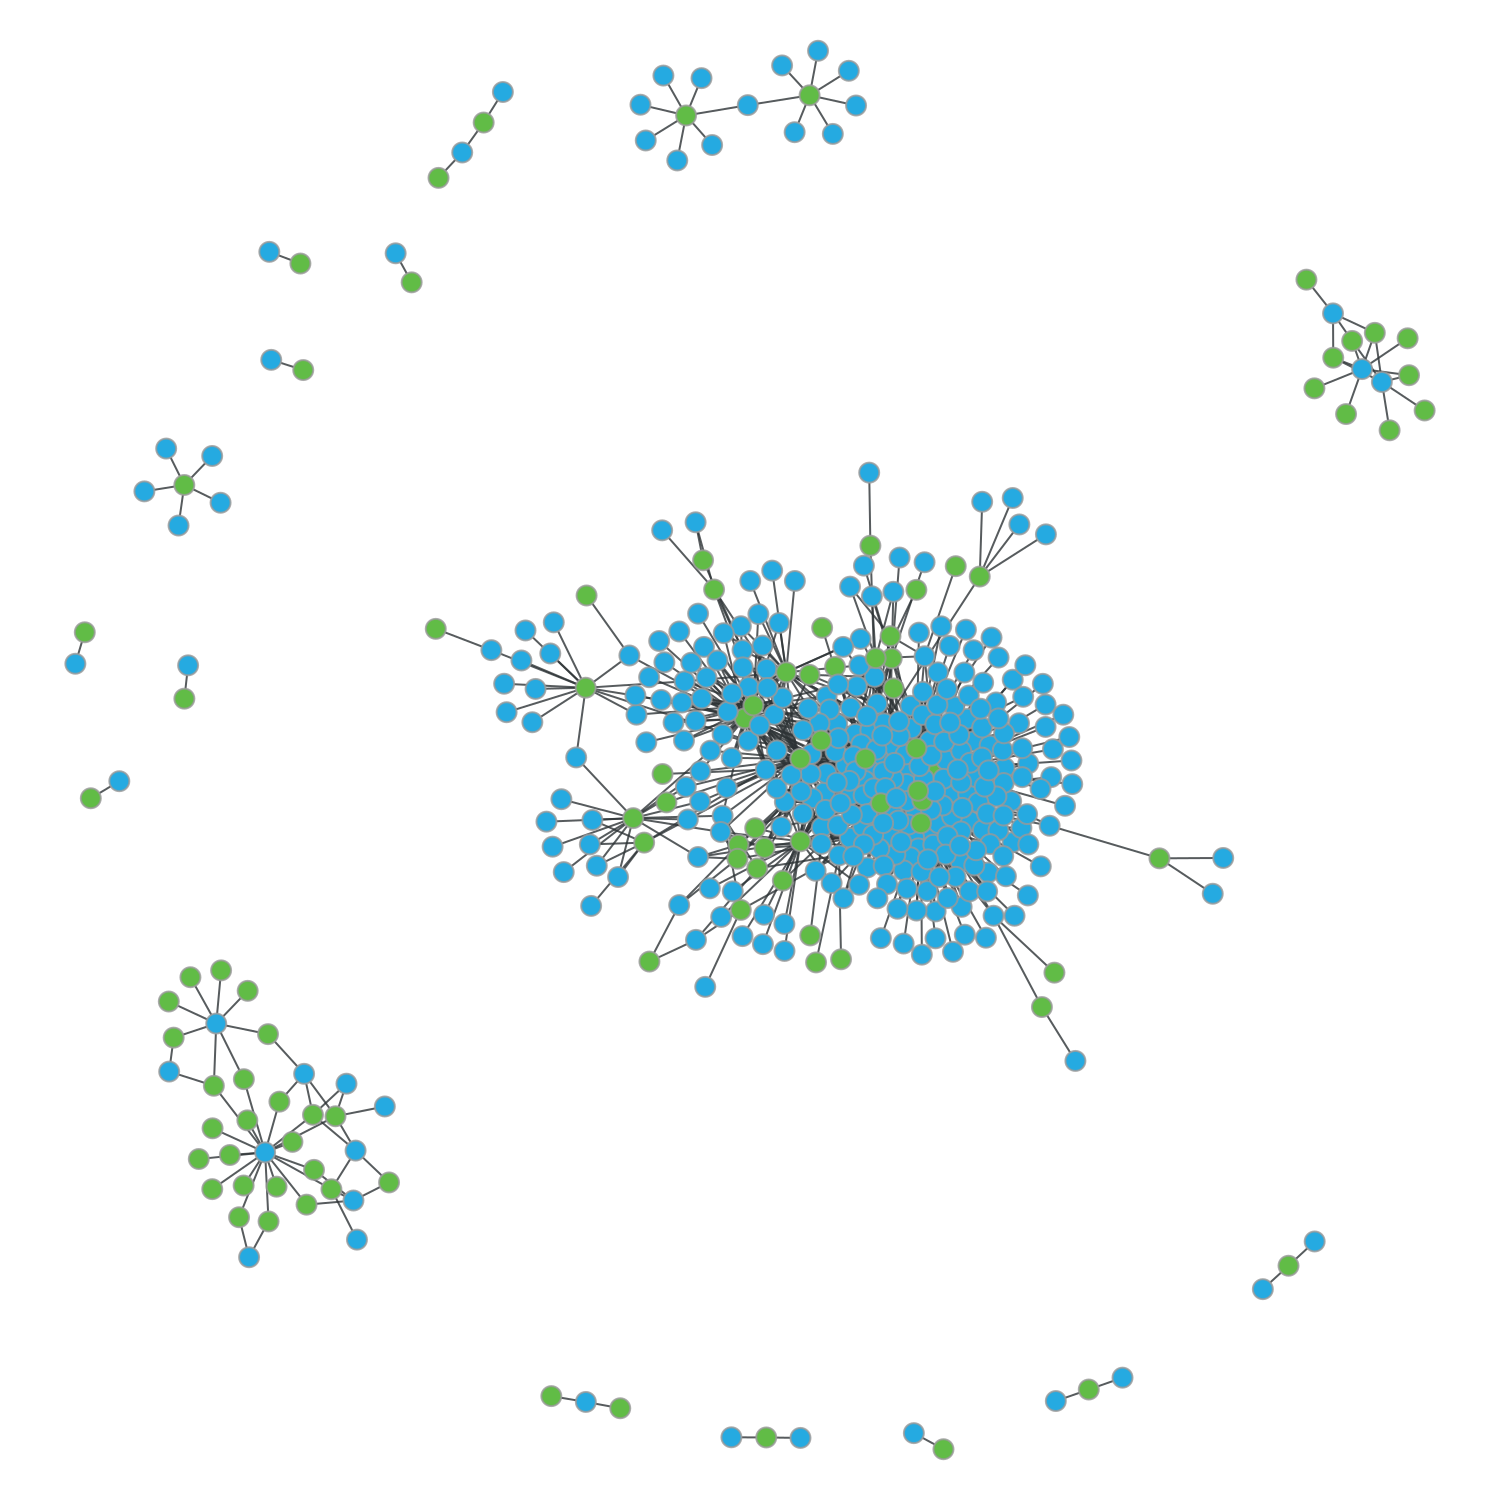

In [5]:
a.plot_graph(graph,'fold')

We can extract some information about this network. For example, the total number of different fragments (subgraphfs or components) that these hits contain.

In [6]:
frag=a.fragments

There are  17  fragments


To see the hits within the network:

In [7]:
a.hits

Query from Fuzzle with 1737 hits belonging to 2 fold(s)

With the function vertex_of_fragment one can get a list of all the vertices within the respective component of the network.

In [8]:
a.vertex_of_fragment(0)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 177,
 178,
 179,
 180,
 181,
 182,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,

The function show_vertex can be used to show the structure of a vertex in the network. To get a vertex use the graph.vertex function. The part of the protein that is shared with the other vertices connected to the vertex is shown in red. The rest of the protein is shown in white.

In [13]:
vertex=graph.vertex(63)
mol=a.show_vertex(vertex)

2020-10-12 14:54:20,556 - protlego - INFO - Attempting to download domain d2hjra1 from the SCOP server
2020-10-12 14:54:21,742 - protlego - INFO - File downloaded as /tmp/tmptf5zir12.pdb


We can have a look at all the edges that this vertex has. That is, how many other vertices this protein is linked to and who they are.

In [14]:
for edge in vertex.all_edges():
    print(edge.source(),edge.target())

63 179
63 284
63 43


Vertex number 63 is connected to another three vertices. We can also print the domain names and the folds they belong to:

In [15]:
for edge in vertex.all_edges():
    source=edge.source()
    target=edge.target()
    print(graph.vp.domain[source],graph.vp.fold[source],graph.vp.domain[target],graph.vp.fold[target])

d2hjra1 c.2 d2afhe_ c.37
d2hjra1 c.2 d1lw7a2 c.37
d2hjra1 c.2 d1cp2a_ c.37


To visualize the superimposition that one edge represents, can use the show_edges() function. To get an edge use the graph.edge function which needs the two vertices as parameters. The proteins get superimposed and the fragments of the two proteins that produce the hit are colored in red, the rest of the proteins is colored in white.

In [16]:
edge=graph.edge(63,179)
mol1,mol2=a.show_edge(edge)

2020-10-12 14:55:08,464 - protlego - INFO - Attempting to download domain d2hjra1 from the SCOP server
2020-10-12 14:55:09,462 - protlego - INFO - File downloaded as /tmp/tmphpnm2jlq.pdb
2020-10-12 14:55:09,463 - protlego - INFO - Attempting to download domain d2afhe_ from the SCOP server
2020-10-12 14:55:10,809 - protlego - INFO - File downloaded as /tmp/tmp3jfcs8am.pdb
2020-10-12 14:55:10,811 - protlego - INFO - Loading /tmp/tmphpnm2jlq.pdb as a chimera object
2020-10-12 14:55:10,894 - protlego - INFO - Loading /tmp/tmp3jfcs8am.pdb as a chimera object
2020-10-12 14:55:10,969 - protlego - INFO - Attempting to download hhs file for d2hjra1 from the FUZZLE server
2020-10-12 14:55:11,287 - protlego - INFO - File downloaded as /tmp/tmps87c1p8u.hhs
2020-10-12 14:55:12,445 - protlego - INFO - Performing alignment 1 with TMalign
2020-10-12 14:55:15,704 - protlego - INFO - The RMSD between the fragments is 4.795979022979736 over 35 alpha carbons


d2hjra1 d2afhe_ 13 49 2 41
